# Deep Learning Assignment 1
### Anirudh Kaushik 2020111015

## Question 1
### Gradient Descent Method 
Consider learning a linear regression function (without bias term) as follows.
$ y = 2x_1 = 3x_2 + ϵ $ 

Here, $ϵ$ ~ N(0, 0.01) (N is Gaussian distribution). Let 400 samples are generated uniformly randomly from $ [-4 ,4]^2$. And then corresponding y values are generated using the equation above.


1. Consider learning a linear regression function (without bias term). Thus, there are 2 parameters only. Assuming squared error loss function, write the objective function $J$ to be minimized. 





Ans. Loss = squared error loss = $L_2$ loss.

$Loss(W) = \frac{1}{T}\sum_{i}^{T}div(f(X_i;W),d_i)$

Here, $d_i$ is the desired output, $X_i$ is the input and $f(X_i;W)$ is the output of the network (the function we learnt).

 Objective function $J$ = $\frac{1}{2}||Y - d||^2$ 

 = $\frac{1}{2T} ∑_{i}^{T}(y_i -d_i)^2$

Where, T is the number of input samples. 

$d_i = 2x_1 + 3x_2 + \epsilon$ , $ϵ$ ~ N(0, 0.01) 

$y_i = w_1 x_1 + w_2 x_2$, Here $w_1$ and $w_2$ are the parameters we have to learn, plugging the above values into the equation we get

$J = \frac{1}{2T} ∑_{i}^{T}(w_1 x_1 + w_2 x_2 - (2x_1 + 3x_2 + \epsilon))^2$ 

$= \frac{1}{2T} ∑_{i}^{T}((w_1 - 2)x_1 + (w_2-3) x_2  - \epsilon)^2$


2.  Plot the error curve with respect to the parameters for this problem.



In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def desired_out(x_1,x_2,num_samples):
  mu, sigma = 0, 0.1 # mean and standard deviation
  epsilon = np.random.normal(mu,sigma, num_samples)
  d = 2*x_1 + 3*x_2 + epsilon
  return d

In [2]:
def actual_out(x_1,x_2,w_1,w_2,num_samples):
  y = w_1*x_1 + w_2*x_2
  return y

In [3]:
def error_curve(x_1,x_2,w_1, w_2, num_samples):
  y = actual_out(x_1,x_2,w_1,w_2,num_samples)
  d = desired_out(x_1,x_2,num_samples)
  error = (1/(2*num_samples))*np.sum((y-d)**2)
  return error
  # error = []
  # for w_1 in np.arange(0,6,0.1):
  #   for w_2 in np.arange(0,6,0.1):
  #     y = actual_out(w_1,w_2,num_samples)
  #     d = desired_out(num_samples)
  #     error.append((1/(2*num_samples))*np.sum((y-d)**2))

minimum Error:  0.005069338634699406


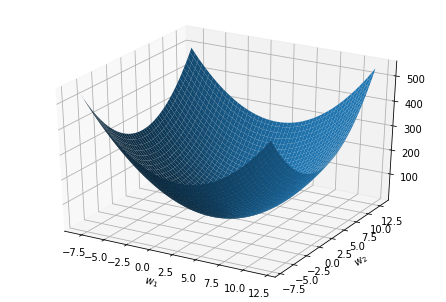

In [4]:
num_samples = 400

w_1 = np.arange(-8.0,12.0,0.1) # +- 10 of 2.0
w_2 = np.arange(-7.0,13.0,0.1) # +- 10 of 3.0
x_1 = np.random.uniform(-4,4,num_samples)
x_2 = np.random.uniform(-4,4,num_samples)
Err = []
l = -1
for i in w_1:
  l+=1
  Err.append([])
  for j in w_2:
    err = error_curve(x_1, x_2, i, j, num_samples)
    Err[l].append(err) # evaluation of the function on the grid


Err = np.array(Err)
print("minimum Error: ", np.min(Err))
W_1, W_2 = np.meshgrid(w_1, w_2)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(W_1, W_2, Err)
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.show()




3. Consider minimizing J using gradient descent with constant step size.
Calculate the optimum learning rate $\eta_{opt}$. How do you get this.





Ans. Any differentiable convex objective function can be approximated as 
$E(w) = E(w^{(k)}) + (w-w^{(k)})\frac{dE(w^{(k)})}{dw} + \frac{1}{2}(w-w^{(k)})^2\frac{d^2E(w^{(k)})}{dw^2} + ...$

Minimizing this we get, (Newton's method)

$\eta_{opt} = \frac{d^2E(w^{(k)})}{dw^2} = a^{-1}$

We have

$Div(w) = \frac{1}{2}((w_1 - 2)x_1 + (w_2-3) x_2  - \epsilon)^2$

This is a scalar function of a multivariate input. The double derivative with respect to $w = \begin{bmatrix}
w_1
\\w_2 
\end{bmatrix} $. Thus, we will have different optimal learning rates for different parameters.

$\eta_{1,opt} = \frac{d^2E(w_1^{(k)})}{dw_1^2} = a_{11}^{-1}$ and $\eta_{2,opt} = \frac{d^2E(w_2^{(k)})}{dw_2^2} = a_{22}^{-1}$

Plugging the value of Div into the above in place of E we get:

$\eta_{1,opt} = \frac{d^2(\frac{1}{2}((w_1 - 2)x_1 + (w_2-3) x_2  - \epsilon)^2)}{dw_1^2} = \frac{1}{x_1^2}$

$\eta_{2,opt} = \frac{d^2(\frac{1}{2}((w_1 - 2)x_1 + (w_2-3) x_2  - \epsilon)^2)}{dw_2^2} = \frac{1}{x_2^2}$

The hessian matrix is: 
$H_E(w^k) = \begin{bmatrix}
x_1^2 \  \ x_1x_2
\\ x_1x_2 \ \ x_2^2
\end{bmatrix}$

using Newton's method to minimize, we get:
$w^{k+1} = w^k - \eta{opt}*H_E(w^k)^{-1}* \nabla_wE(w^k)^T$

Here, $w^{k+1} = \begin{bmatrix}0\\0 \end{bmatrix}, w^k$ is a random starting point. We solve the above equation (shown in code) to get the optimal step size.

For overall optimal step size, we get 

In [5]:
import numpy as np
num_samples = 400
def Hessian(X_1, X_2, num_samples):
  x_11 = np.sum(X_1**2)
  x_12 = np.sum(X_1*X_2)
  x_22 = np.sum(X_2**2)
  x_21 = np.sum(X_2*X_1)
  res = np.array([np.array([x_11,x_12]), np.array([x_21,x_22])])/num_samples
  return res


def Hessian_inv(hess,num_samples):
  det = hess[0][0]*hess[1][1] - hess[1][0]*hess[0][1]
  inv_hess = np.array([np.array([hess[1][1], -1*hess[0][1]]),np.array([-1*hess[1][0], hess[0][0]])])
  inv_hess = inv_hess/det
  inv_hess = inv_hess
  return inv_hess

def grad_loss(w_1, w_2,x_1,x_2, num_samples):
  de_dw1 = 0
  for i in range(len(x_1)):
      de_dw1 += ((w_1-2)*x_1[i] + (w_2 - 3)*x_2[i])*x_1[i]
  de_dw1 = de_dw1/num_samples
  de_dw2 = 0
  for i in range(len(x_1)):
      de_dw2 += ((w_1-2)*x_1[i] + (w_2 - 3)*x_2[i])*x_2[i]
  de_dw2 = de_dw2/num_samples

  return np.array([de_dw1, de_dw2])

def hess_inv_X_grad_loss(hess_inv, grad_E):
  return np.array([hess_inv[0][0]*grad_E[0] + hess_inv[0][1]*grad_E[1], hess_inv[1][0]*grad_E[0] + hess_inv[1][1]*grad_E[1]])


def calculate_optimal_step_size():
  res = Hessian(X_1,X_2,num_samples)
  # print(res)
  hess_inv = Hessian_inv(res,num_samples)
  # print(hess_inv)
  pts = np.array([0,0])
  grad_E = grad_loss(pts[0],pts[1],X_1,X_2, num_samples)
  desired_pts = np.array([2,3])
  he_grad = hess_inv_X_grad_loss(hess_inv, grad_E)
  n_opt = -1*(desired_pts - pts)

  return (n_opt[0]/he_grad[0], n_opt[1]/he_grad[1])

X_1 = np.random.uniform(-4,4,num_samples)
X_2 = np.random.uniform(-4,4,num_samples)
n_opt = calculate_optimal_step_size()
n_opt2 = np.mean(n_opt)
print(f"Optimal step size: {n_opt2} ~= 1")

Optimal step size: 1.0 ~= 1


 Try gradient descent with following step sizes η =
$\frac{0.9η_{opt}}{2}$
,
$\frac{1.5η_{opt}}{2}$
, $η_{opt}$, $1.5η_{opt}$.
For definiteness, we consider convergence to be complete J < 0.001. For
every case,

In [6]:
def error_fn_q1(y,d):
  error = (1/(2*num_samples))*np.sum((y-d)**2)
  return error

In [7]:
def error_fn_contour(x1,x2,w1,w2,num_samples):
  L = -1
  Err = []
  for i in range(w1.shape[0]):
    # print("shape: ",w1.shape)
    L+=1
    Err.append([])
    for j in range(w1[i].size ):
      y = actual_out(x_1, x_2,w1[i][j],w2[i][j],num_samples)
      d = desired_out(x_1,x_2,num_samples)
      err = error_fn_q1(y,d)
      Err[L].append(err)
  return np.array(Err)


In [8]:
def gradient_descent(x_1, x_2, w_1, w_2, num_samples,error_fn, iterations = 1000, learning_rate = 1,
                     stopping_threshold = 0.001):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = np.array([w_1,w_2])
    iterations = iterations
    learning_rate = learning_rate
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # Making predictions
        y = actual_out(x_1, x_2,current_weight[0],current_weight[1],num_samples)
        d = desired_out(x_1,x_2,num_samples)
         
        # Calculationg the current cost
        current_cost = error_fn(y, d)
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        hess = Hessian(x_1,x_2,num_samples)
        hess_inv = Hessian_inv(hess,num_samples)
        grad_E = grad_loss(current_weight[0],current_weight[1],x_1,x_2, num_samples)
        he_grad = hess_inv_X_grad_loss(hess_inv, grad_E)
         
        # Updating weights and bias
        
        current_weight = current_weight - (learning_rate * he_grad)
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}")
     
    weights = np.array(weights) 
    epochs = np.linspace(0,len(costs),len(costs) )

    # Visualizing the weights and cost at for all iterations
    print(f"========================Learning Rate:{learning_rate}========================")
    plt.figure(figsize = (8,6))
    plt.plot(epochs, costs)
    plt.scatter(epochs, costs, marker='o', color='red')
    plt.title("Cost vs epoch")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()

    theta0_grid = np.linspace(2-10,2+10,101)
    theta1_grid = np.linspace(3-10,3+10,101)

    # A labeled contour plot for the RHS cost function
    X, Y = np.meshgrid(theta0_grid, theta1_grid)
    # print("X shape: ",X.shape)
    J_grid = error_fn_contour(x_1,x_2,X,Y,num_samples)
    contours = plt.contour(X, Y, J_grid, 10)
    plt.clabel(contours)
    # The target parameter values indicated on the cost function contour plot
    for j in range(1,len(weights)):
      plt.annotate('', xy=weights[j], xytext=weights[j-1],
                    arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1},
                    va='center', ha='center')
    plt.scatter(weights[:,0],weights[:,1] )
    plt.plot(weights[:,0],weights[:,1], 'r' )
    for x in range(len(weights) -1):
      plt.arrow(weights[:,0][x],weights[:,1][x],weights[:,0][x+1] -weights[:,0][x],weights[:,1][x+1]-weights[:,1][x],  )

    plt.show()

    
     
    return current_weight

Iteration 1: Cost 128.2085724734538, Weight         [-1.62512577  2.28830214]
Iteration 2: Cost 38.78801832230324, Weight         [0.00618083 2.60856618]
Iteration 3: Cost 11.735372980847004, Weight         [0.90339945 2.7847114 ]
Iteration 4: Cost 3.5808761077210924, Weight         [1.3968697  2.88159127]
Iteration 5: Cost 1.0730209378501032, Weight         [1.66827834 2.9348752 ]
Iteration 6: Cost 0.3250514065505392, Weight         [1.81755308 2.96418136]
Iteration 7: Cost 0.1076387806000494, Weight         [1.8996542  2.98029975]
Iteration 8: Cost 0.03741700194498817, Weight         [1.94480981 2.98916486]
Iteration 9: Cost 0.013939755098327957, Weight         [1.96964539 2.99404067]
Iteration 10: Cost 0.008119072770402998, Weight         [1.98330497 2.99672237]
Iteration 11: Cost 0.00550900062654856, Weight         [1.99081773 2.9981973 ]
========================Learning Rate:0.45========================


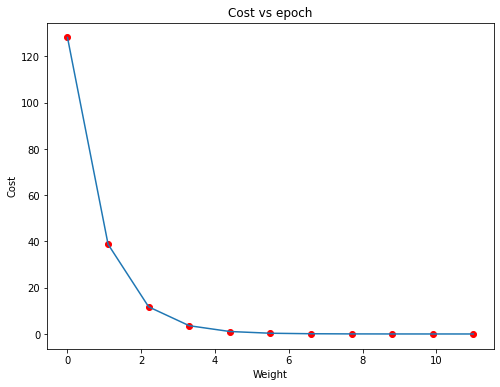

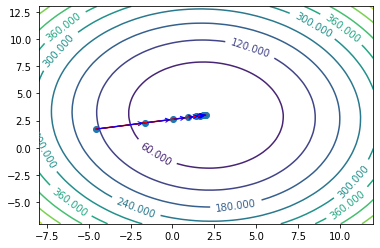

Iteration 1: Cost 128.15505173869715, Weight         [0.35221556 2.67650097]
Iteration 2: Cost 8.051640272281782, Weight         [1.58805389 2.91912524]
Iteration 3: Cost 0.5091345744779092, Weight         [1.89701347 2.97978131]
Iteration 4: Cost 0.03541845590591144, Weight         [1.97425337 2.99494533]
Iteration 5: Cost 0.007167532110472072, Weight         [1.99356334 2.99873633]
Iteration 6: Cost 0.004806936832842702, Weight         [1.99839084 2.99968408]
========================Learning Rate:0.75========================


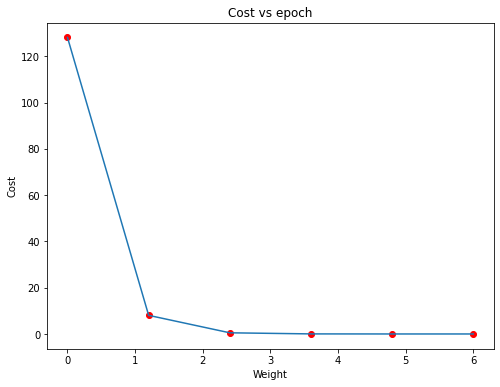

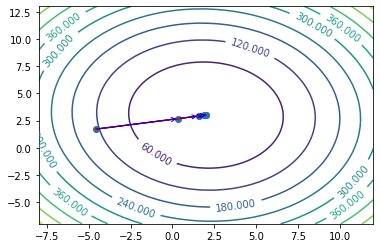

Iteration 1: Cost 128.10015166611794, Weight         [2. 3.]
Iteration 2: Cost 0.005533982159165633, Weight         [2. 3.]
========================Learning Rate:1========================


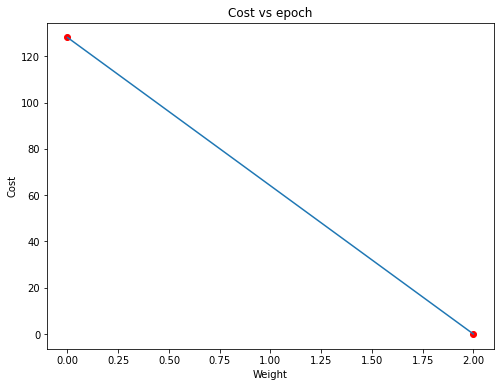

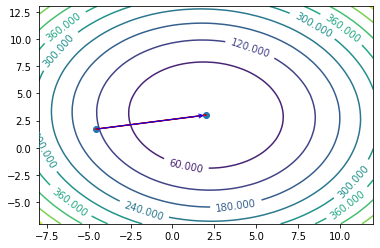

Iteration 1: Cost 128.29666669526708, Weight         [5.29556888 3.64699806]
Iteration 2: Cost 31.98911454727596, Weight         [0.35221556 2.67650097]
Iteration 3: Cost 8.048402565256158, Weight         [2.82389222 3.16174951]
Iteration 4: Cost 1.9952991207933153, Weight         [1.58805389 2.91912524]
Iteration 5: Cost 0.5072218849122923, Weight         [2.20597306 3.04043738]
Iteration 6: Cost 0.12736529831873625, Weight         [1.89701347 2.97978131]
Iteration 7: Cost 0.035445426796364914, Weight         [2.05149326 3.01010934]
Iteration 8: Cost 0.012646141147986954, Weight         [1.97425337 2.99494533]
Iteration 9: Cost 0.006815854964418331, Weight         [2.01287332 3.00252734]
Iteration 10: Cost 0.005636604791839606, Weight         [1.99356334 2.99873633]
========================Learning Rate:1.5========================


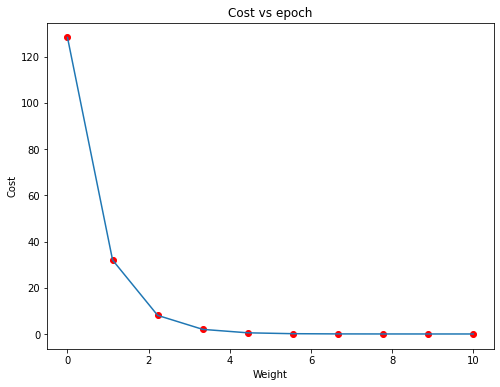

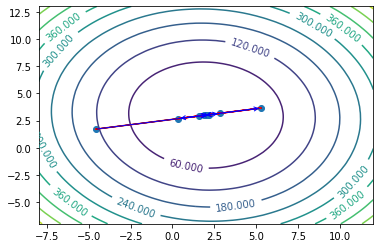

In [9]:
eta_opt = 1
eta = [(0.9*eta_opt)/2.0, (1.5*eta_opt)/2.0, eta_opt, 1.5*eta_opt]


num_samples = 400
x_1 = np.random.uniform(-4,4,num_samples)
x_2 = np.random.uniform(-4,4,num_samples)
w = np.random.uniform(-5,5,2) # randomly initialize weights
w_1 = w[0]
w_2 = w[1]
for i in eta:
  gradient_descent(x_1, x_2, w_1, w_2, num_samples,error_fn_q1, iterations = 1000, learning_rate = i,
                     stopping_threshold = 0.001)

# Question 2
Consider the Rosenbrock function $f(x, y) = x^2 + 100(y − x^2)^2$
, which is used to
benchmark optimization algorithms and the following variant admits a global
minimum at $(0, 0)^T$. Use random initialization of the parameters.


1. Run gradient descent with constant step size to minimize $f(x, y)$. Show
contour plot of the function. After every update, using arrow show the
movement in the contour plots. Do it till convergence.

In [10]:
def error_fn_q2(x,y):
  return x**2 + 100*((y - x**2)**2)

In [11]:
def grad_loss(pt):
  dx_1 = 2*pt[0] - 400*pt[0]*(pt[1] - (pt[0]**2))
  dx_2 = 200*(pt[1] - (pt[0]**2))
  return dx_1, dx_2

# def hess_inv_X_grad_loss(hess_inv, grad_E):
#   return np.array([hess_inv[0][0]*grad_E[0] + hess_inv[0][1]*grad_E[1], hess_inv[1][0]*grad_E[0] + hess_inv[1][1]*grad_E[1]])


In [12]:
def gradient_descent(w_1, w_2, iterations = 1000, learning_rate = 0.01,
                     stopping_threshold = 0.001):
     
    # Initializing weight, bias, learning rate and iterations
    start_pt = np.array([w_1,w_2])

    iterations = iterations
    learning_rate = learning_rate
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # Calculationg the current cost
        current_cost = error_fn_q2(start_pt[0],start_pt[1])
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(start_pt)
         
        grad_E = np.array(grad_loss(start_pt))

         
        # Updating weights and bias
        
        start_pt = start_pt - np.dot(learning_rate,grad_E)
        

                 
        # Printing the parameters for each 1000th iteration
        # print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {start_pt}")
     
    weights = np.array(weights) 
    epochs = np.linspace(0,len(costs),len(costs) )
    # Visualizing the weights and cost at for all iterations
    print(f"========================Learning Rate:{learning_rate}========================")
    print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {start_pt}")
    plt.figure(figsize = (8,6))
    plt.plot(epochs, costs)
    plt.scatter(epochs, costs, marker='o', color='red')
    plt.title("Cost vs epoch")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
    

    theta0_grid = np.linspace(0-1.0,0+1.0,101)
    theta1_grid = np.linspace(0-1.0,0+1.0,101)
    X, Y = np.meshgrid(theta0_grid, theta1_grid)

    J_grid = error_fn_q2(X,Y)
    contours = plt.contour(X, Y, J_grid, 10)
    plt.clabel(contours)
    # The target parameter values indicated on the cost function contour plot
    for j in range(1,len(weights)):
      plt.annotate('', xy=weights[j], xytext=weights[j-1],
                    arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1},
                    va='center', ha='center')
    plt.scatter(weights[:,0],weights[:,1] )
    plt.plot(weights[:,0],weights[:,1], 'r' )
    for x in range(len(weights) -1):
      plt.arrow(weights[:,0][x],weights[:,1][x],weights[:,0][x+1] -weights[:,0][x],weights[:,1][x+1]-weights[:,1][x],  )

    plt.show()
    
     
    return start_pt

========================Learning Rate:0.002========================
Iteration 680: Cost 0.01301954876292583, Weight         # [0.11407558 0.01326447]


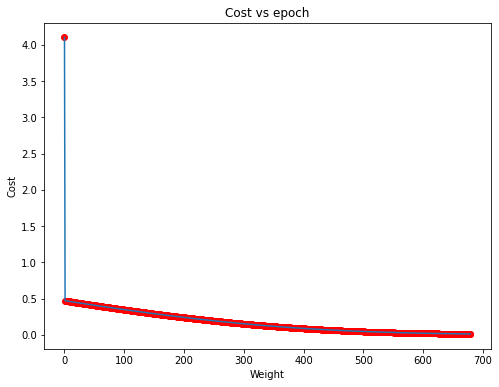

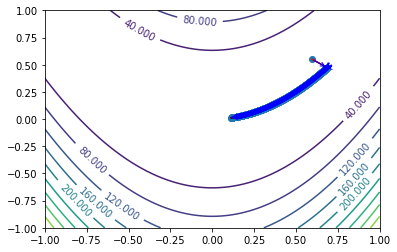

In [13]:
eta = 0.002
w_1 = np.random.uniform(0.0,1.0)
w_2 = np.random.uniform(0.0,1.0)
# # print(grad_loss(w_1,w_2))
res = gradient_descent(w_1, w_2, iterations = 1000, learning_rate = eta,
                     stopping_threshold = 0.0001)

2. Use gradient descent with Polyak’s momentum method to minimize $f(x, y)$. Show contour plot of the function. After every update, using arrow show
the movement in the contour plots. Do it till convergence.

In [14]:
def Polyak_gradient_descent(w_1, w_2,momentum, iterations = 1000, learning_rate = 0.01,
                     stopping_threshold = 0.001):
     
    # Initializing weight, bias, learning rate and iterations
    start_pt = np.array([w_1,w_2])

    start_pt_0 = start_pt

    iterations = iterations
    learning_rate = learning_rate
     
    costs = []
    weights = []
    previous_cost = None

    pts = []
     
    # Estimation of optimal parameters
    for i in range(iterations):
        pts.append(start_pt)
         
        # Calculationg the current cost
        current_cost = error_fn_q2(start_pt[0],start_pt[1])
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(start_pt)
         
        grad_E = np.array(grad_loss(start_pt))

         
        # Updating weights and bias
        if i > 0:
          start_pt_0 = pts[i-1]
          start_pt = start_pt - np.dot(learning_rate,grad_E) + momentum*(start_pt - start_pt_0) # polyak method
        else:
          start_pt = start_pt - np.dot(learning_rate,grad_E)
        

                 
        # Printing the parameters for each 1000th iteration
        # print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {start_pt}")
     
    weights = np.array(weights) 
    epochs = np.linspace(0,len(costs),len(costs) )
    # Visualizing the weights and cost at for all iterations
    print(f"========================Learning Rate:{learning_rate}========================")
    print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {start_pt}")
    plt.figure(figsize = (8,6))
    plt.plot(epochs, costs)
    plt.scatter(epochs, costs, marker='o', color='red')
    plt.title("Cost vs epoch")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
    

    theta0_grid = np.linspace(0-1.0,0+1.0,101)
    theta1_grid = np.linspace(0-1.0,0+1.0,101)
    X, Y = np.meshgrid(theta0_grid, theta1_grid)

    J_grid = error_fn_q2(X,Y)
    contours = plt.contour(X, Y, J_grid, 10)
    plt.clabel(contours)
    # The target parameter values indicated on the cost function contour plot
    for j in range(1,len(weights)):
      plt.annotate('', xy=weights[j], xytext=weights[j-1],
                    arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1},
                    va='center', ha='center')
    plt.scatter(weights[:,0],weights[:,1] )
    # plt.plot(weights[:,0],weights[:,1], 'r' )
    plt.plot(weights[:,0],weights[:,1], 'r' )
    

    plt.show()
    
     
    return start_pt

========================Learning Rate:0.002========================
Iteration 464: Cost 0.006257741572303328, Weight         # [0.07909634 0.00637913]


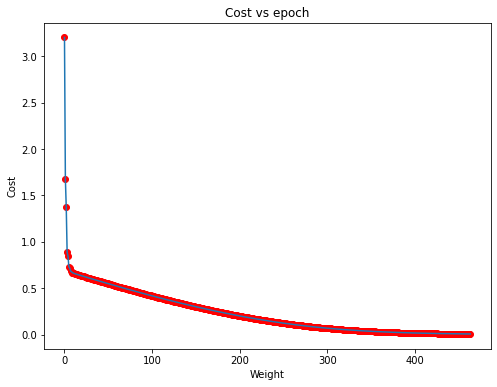

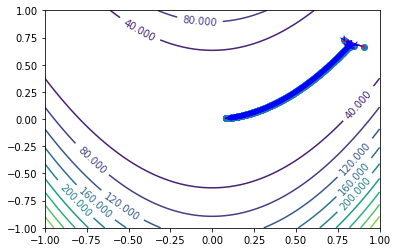

In [15]:
eta = 0.002
w_1 = np.random.uniform(0.0,1.0)
w_2 = np.random.uniform(0.0,1.0)
# # print(grad_loss(w_1,w_2))
res = Polyak_gradient_descent(w_1, w_2,momentum=0.5, iterations = 1000, learning_rate = eta,
                     stopping_threshold = 0.0001)

3. Mininimize $f(x, y)$ using Nesterov accelerated gradient descent. Show contour plot of the function. After every update, using arrow show the movement in the contour plots. Do it till convergence.

In [16]:
def Nesterov_acc_gradient_descent(w_1, w_2,momentum, iterations = 1000, learning_rate = 0.01,
                     stopping_threshold = 0.001):
     
    # Initializing weight, bias, learning rate and iterations
    start_pt = np.array([w_1,w_2])

    start_pt_0 = start_pt

    iterations = iterations
    learning_rate = learning_rate
     
    costs = []
    weights = []
    previous_cost = None

    pts = []
     
    # Estimation of optimal parameters
    for i in range(iterations):
        pts.append(start_pt)
         
        # Calculationg the current cost
        current_cost = error_fn_q2(start_pt[0],start_pt[1])
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(start_pt)
         
        grad_E = np.array(grad_loss(start_pt))

         
        # Updating weights and bias
        if i == 1:
          start_pt_0 = pts[i-1]
          update_t = (start_pt - start_pt_0)
          start_pt = start_pt - np.dot(learning_rate,grad_E) + momentum*update_t # polyak method (start_pt - start_pt_0) = update_t
        elif i > 1:
          w_look_ahead = start_pt - momentum*(pts[i-1] - pts[i-2]) # (pts[i-1] - pts[i-2]) = update_t-1
          grad_E_prime = np.array(grad_loss(w_look_ahead))
          update_t = momentum*(pts[i-1] - pts[i-2]) + learning_rate*grad_E_prime
          start_pt = start_pt - momentum*update_t
        else:
          start_pt = start_pt - np.dot(learning_rate,grad_E)
        

                 
        # Printing the parameters for each 1000th iteration
        # print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {start_pt}")
     
    weights = np.array(weights) 
    epochs = np.linspace(0,len(costs),len(costs) )
    # Visualizing the weights and cost at for all iterations
    print(f"========================Learning Rate:{learning_rate}========================")
    print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {start_pt}")
    plt.figure(figsize = (8,6))
    plt.plot(epochs, costs)
    plt.scatter(epochs, costs, marker='o', color='red')
    plt.title("Cost vs epoch")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
    

    theta0_grid = np.linspace(0-1.0,0+1.0,101)
    theta1_grid = np.linspace(0-1.0,0+1.0,101)
    X, Y = np.meshgrid(theta0_grid, theta1_grid)

    J_grid = error_fn_q2(X,Y)
    contours = plt.contour(X, Y, J_grid, 10)
    plt.clabel(contours)
    # The target parameter values indicated on the cost function contour plot
    for j in range(1,len(weights)):
      plt.annotate('', xy=weights[j], xytext=weights[j-1],
                    arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1},
                    va='center', ha='center')
    plt.scatter(weights[:,0],weights[:,1] )
    # plt.plot(weights[:,0],weights[:,1], 'r' )
    plt.plot(weights[:,0],weights[:,1], 'r' )
    

    plt.show()
    
     
    return start_pt

========================Learning Rate:0.005========================
Iteration 14: Cost 2.887400378913554e-05, Weight         # [0.00019623 0.00053703]


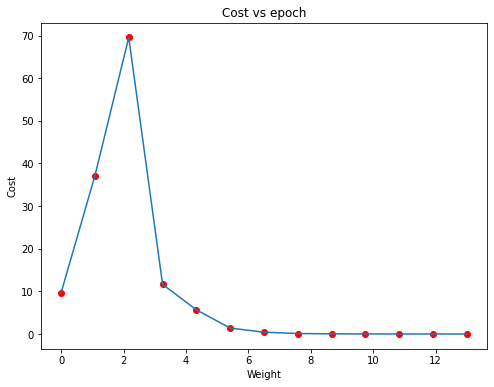

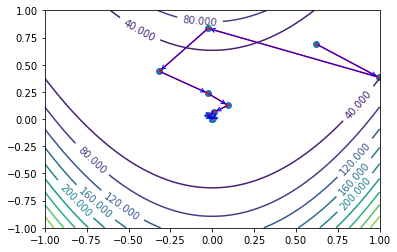

In [17]:
eta = 0.005
w_1 = np.random.uniform(0.0,1.0)
w_2 = np.random.uniform(0.0,1.0)
# # print(grad_loss(w_1,w_2))
res = Nesterov_acc_gradient_descent(w_1, w_2,momentum=0.5, iterations = 1000, learning_rate = eta,
                     stopping_threshold = 0.0001)

4. Minimize $f(x, y)$ using Adam optimizer. Show contour plot of the function. After every update, using arrow show the movement in the contour plots. Do it till convergence.

In [18]:
def Adam_optim_gradient_descent(w_1, w_2,m1,m2, iterations = 1000, learning_rate = 0.01,
                     stopping_threshold = 0.001):
     
    # Initializing weight, bias, learning rate and iterations
    start_pt = np.array([w_1,w_2])

    start_pt_0 = start_pt

    iterations = iterations
    learning_rate = learning_rate
     
    costs = []
    weights = []
    previous_cost = None

    pts = []
    p_t = []
    q_t = []
     
    # Estimation of optimal parameters
    for i in range(iterations):
        pts.append(start_pt)
         
        # Calculationg the current cost
        current_cost = error_fn_q2(start_pt[0],start_pt[1])
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(start_pt)
         
        grad_E = np.array(grad_loss(start_pt))

         
        # Updating weights and bias
        if i > 0:
          p_1 = m1*p_t[i-1] + (1-m1)*grad_E ## adam optimizer
          q_1 = m2*q_t[i-1] + (1-m2)*(grad_E**2)

          p_t.append(p_1)
          q_t.append(q_1)

          p_hat_t = p_1/(1-(m1**i))
          q_hat_t = q_1/(1-(m2**i))

          epsilon = 10**(-8)
          
          start_pt = start_pt - (learning_rate*(p_hat_t/(np.sqrt(q_hat_t) + epsilon)))

        else:
          p_t.append(0) #initialize values
          q_t.append(0)
          start_pt = start_pt - np.dot(learning_rate,grad_E)
        

                 
        # Printing the parameters for each 1000th iteration
        # print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {start_pt}")
     
    weights = np.array(weights) 
    epochs = np.linspace(0,len(costs),len(costs) )
    # Visualizing the weights and cost at for all iterations
    print(f"========================Learning Rate:{learning_rate}========================")
    print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {start_pt}")
    plt.figure(figsize = (8,6))
    plt.plot(epochs, costs)
    plt.scatter(epochs, costs, marker='o', color='red')
    plt.title("Cost vs epoch")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
    

    theta0_grid = np.linspace(0-1.0,0+1.0,101)
    theta1_grid = np.linspace(0-1.0,0+1.0,101)
    X, Y = np.meshgrid(theta0_grid, theta1_grid)

    J_grid = error_fn_q2(X,Y)
    contours = plt.contour(X, Y, J_grid, 10)
    plt.clabel(contours)
    # The target parameter values indicated on the cost function contour plot
    for j in range(1,len(weights)):
      plt.annotate('', xy=weights[j], xytext=weights[j-1],
                    arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1},
                    va='center', ha='center')
    plt.scatter(weights[:,0],weights[:,1] )
    # plt.plot(weights[:,0],weights[:,1], 'r' )
    plt.plot(weights[:,0],weights[:,1], 'r' )
    

    plt.show()
    
     
    return start_pt

========================Learning Rate:0.005========================
Iteration 24: Cost 8.245482291572339e-05, Weight         # [0.00819524 0.00045822]


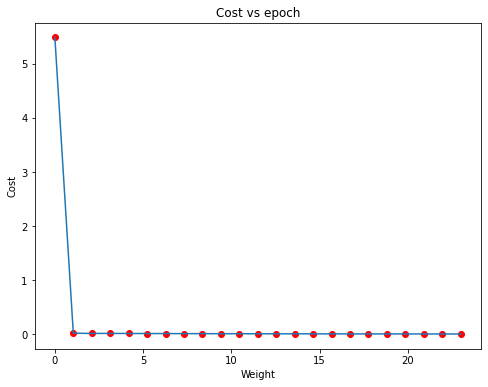

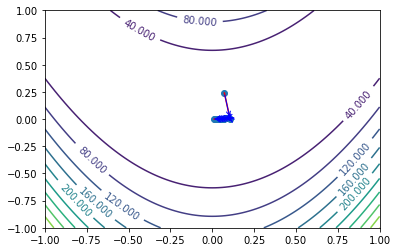

In [19]:
eta = 0.005
w_1 = np.random.uniform(0.0,1.0)
w_2 = np.random.uniform(0.0,1.0)
# # print(grad_loss(w_1,w_2))
res = Adam_optim_gradient_descent(w_1, w_2,m1=0.5,m2=0.6, iterations = 1000, learning_rate = eta,
                     stopping_threshold = 0.0001)

Consider the following function

$f(x,y) = \frac{50}{9}(x^2+y^2)^3 - \frac{209}{18}(x^2+y^2)^2 + \frac{59}{9}(x^2+y^2)$

This function has global minimum at $(0, 0)^T$ and local minima at $x^2 + y^2 = 1$ Consider minimizing $f(x, y)$ using the methods below. Use random initialization of the parameters.


1. Use gradient descent with constant step size to minimize $f(x, y)$. Show
contour plot of the function. After every update, using arrow show the
movement in the contour plots. Do it till convergence. 

In [20]:
def error_fn_q3(x,y):
  L = (x**2 + y**2)
  fn = (50/9)*(L**3) - (209/18)*(L**2) + (59/9)*(L)
  return fn

In [21]:
def grad_loss(pt):
  L = (pt[0]**2 + pt[1]**2)
  dx_1 = (150/9)*(L**2)*2*pt[0] - (418/18)*(L)*2*pt[0] + (118/9)*pt[0]
  dx_2 = (150/9)*(L**2)*2*pt[1] - (418/18)*(L)*2*pt[1] + (118/9)*pt[1]
  return dx_1, dx_2


In [22]:
def gradient_descent(w_1, w_2, iterations = 1000, learning_rate = 0.01,
                     stopping_threshold = 0.001):
     
    # Initializing weight, bias, learning rate and iterations
    start_pt = np.array([w_1,w_2])

    iterations = iterations
    learning_rate = learning_rate
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # Calculationg the current cost
        current_cost = error_fn_q3(start_pt[0],start_pt[1])
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(start_pt)
         
        grad_E = np.array(grad_loss(start_pt))

         
        # Updating weights and bias
        
        start_pt = start_pt - np.dot(learning_rate,grad_E)
        

                 
        # Printing the parameters for each 1000th iteration
        # print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {start_pt}")
     
    weights = np.array(weights) 
    epochs = np.linspace(0,len(costs),len(costs) )
    # Visualizing the weights and cost at for all iterations
    print(f"========================Learning Rate:{learning_rate}========================")
    print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {start_pt}")
    plt.figure(figsize = (8,6))
    plt.plot(epochs, costs)
    plt.scatter(epochs, costs, marker='o', color='red')
    plt.title("Cost vs epoch")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
    

    theta0_grid = np.linspace(0-1.0,0+1.0,101)
    theta1_grid = np.linspace(0-1.0,0+1.0,101)
    X, Y = np.meshgrid(theta0_grid, theta1_grid)

    J_grid = error_fn_q3(X,Y)
    contours = plt.contour(X, Y, J_grid, 10)
    plt.clabel(contours)
    # The target parameter values indicated on the cost function contour plot
    for j in range(1,len(weights)):
      plt.annotate('', xy=weights[j], xytext=weights[j-1],
                    arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1},
                    va='center', ha='center')
    plt.scatter(weights[:,0],weights[:,1] )
    plt.plot(weights[:,0],weights[:,1], 'r' )
    for x in range(len(weights) -1):
      plt.arrow(weights[:,0][x],weights[:,1][x],weights[:,0][x+1] -weights[:,0][x],weights[:,1][x+1]-weights[:,1][x],  )

    plt.show()
    
     
    return start_pt

========================Learning Rate:0.001========================
Iteration 148: Cost 0.501221189543311, Weight         # [ 0.75954649 -0.63828793]


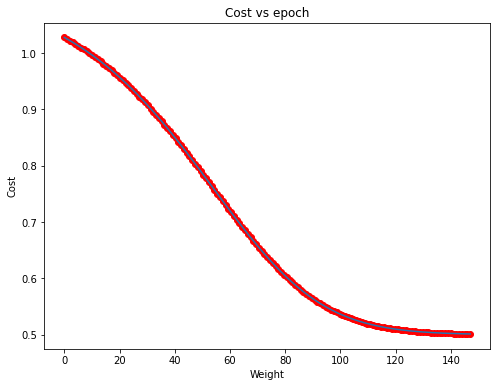

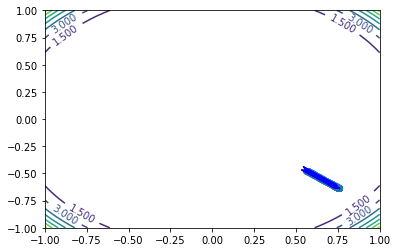

res^2 = res[0]**2 + res[1]**2:  0.9843223578611349 ~=  1


In [23]:
eta = 0.001
w_1 = np.random.uniform(-0.99,0.99)
w_2 = np.random.uniform(-0.99,0.99)
# # print(grad_loss(w_1,w_2))
res = gradient_descent(w_1, w_2, iterations = 1000, learning_rate = eta,
                     stopping_threshold = 0.0001)
print("res^2 = res[0]**2 + res[1]**2: ",res[0]**2 + res[1]**2,"~= ",round(res[0]**2 + res[1]**2))

2. Use gradient descent with Polyak’s momentum method to minimize $f(x, y)$. Show contour plot of the function. After every update, using arrow show
the movement in the contour plots. Do it till convergence.

In [24]:
def Polyak_gradient_descent(w_1, w_2,momentum, iterations = 1000, learning_rate = 0.01,
                     stopping_threshold = 0.001):
     
    # Initializing weight, bias, learning rate and iterations
    start_pt = np.array([w_1,w_2])

    start_pt_0 = start_pt

    iterations = iterations
    learning_rate = learning_rate
     
    costs = []
    weights = []
    previous_cost = None

    pts = []
     
    # Estimation of optimal parameters
    for i in range(iterations):
        pts.append(start_pt)
         
        # Calculationg the current cost
        current_cost = error_fn_q3(start_pt[0],start_pt[1])
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(start_pt)
         
        grad_E = np.array(grad_loss(start_pt))

         
        # Updating weights and bias
        if i > 0:
          start_pt_0 = pts[i-1]
          start_pt = start_pt - np.dot(learning_rate,grad_E) + momentum*(start_pt - start_pt_0) # polyak method
        else:
          start_pt = start_pt - np.dot(learning_rate,grad_E)
        

                 
        # Printing the parameters for each 1000th iteration
        # print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {start_pt}")
     
    weights = np.array(weights) 
    epochs = np.linspace(0,len(costs),len(costs) )
    # Visualizing the weights and cost at for all iterations
    print(f"========================Learning Rate:{learning_rate}========================")
    print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {start_pt}")
    plt.figure(figsize = (8,6))
    plt.plot(epochs, costs)
    plt.scatter(epochs, costs, marker='o', color='red')
    plt.title("Cost vs epoch")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
    

    theta0_grid = np.linspace(0-1.0,0+1.0,101)
    theta1_grid = np.linspace(0-1.0,0+1.0,101)
    X, Y = np.meshgrid(theta0_grid, theta1_grid)

    J_grid = error_fn_q3(X,Y)
    contours = plt.contour(X, Y, J_grid, 10)
    plt.clabel(contours)
    # The target parameter values indicated on the cost function contour plot
    for j in range(1,len(weights)):
      plt.annotate('', xy=weights[j], xytext=weights[j-1],
                    arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1},
                    va='center', ha='center')
    plt.scatter(weights[:,0],weights[:,1] )
    # plt.plot(weights[:,0],weights[:,1], 'r' )
    plt.plot(weights[:,0],weights[:,1], 'r' )
    

    plt.show()
    
     
    return start_pt

========================Learning Rate:0.001========================
Iteration 15: Cost 0.5004596097939542, Weight         # [ 0.43179194 -0.89664393]


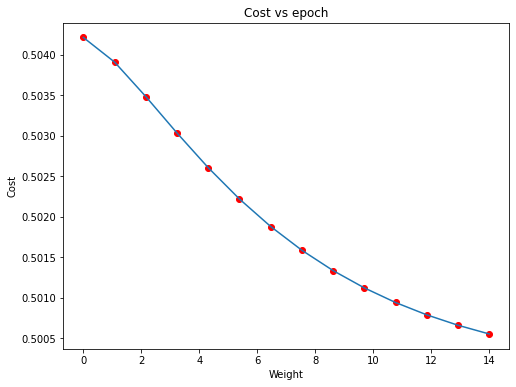

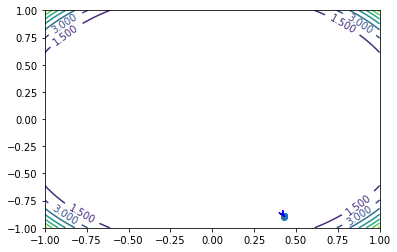

res^2 = res[0]**2 + res[1]**2:  0.9904146136481738 ~=  1


In [25]:
eta = 0.001
w_1 = np.random.uniform(-0.99,0.99)
w_2 = np.random.uniform(-0.99,0.99)
# # print(grad_loss(w_1,w_2))
res = Polyak_gradient_descent(w_1, w_2,momentum=0.5, iterations = 1000, learning_rate = eta,
                     stopping_threshold = 0.0001)
print("res^2 = res[0]**2 + res[1]**2: ",res[0]**2 + res[1]**2,"~= ",round(res[0]**2 + res[1]**2))

3. Mininimize $f(x, y)$ using Nesterov accelerated gradient descent. Show contour plot of the function. After every update, using arrow show the movement in the contour plots. Do it till convergence.

In [26]:
def Nesterov_acc_gradient_descent(w_1, w_2,momentum, iterations = 1000, learning_rate = 0.01,
                     stopping_threshold = 0.001):
     
    # Initializing weight, bias, learning rate and iterations
    start_pt = np.array([w_1,w_2])

    start_pt_0 = start_pt

    iterations = iterations
    learning_rate = learning_rate
     
    costs = []
    weights = []
    previous_cost = None

    pts = []
     
    # Estimation of optimal parameters
    for i in range(iterations):
        pts.append(start_pt)
         
        # Calculationg the current cost
        current_cost = error_fn_q3(start_pt[0],start_pt[1])
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(start_pt)
         
        grad_E = np.array(grad_loss(start_pt))

         
        # Updating weights and bias
        if i == 1:
          start_pt_0 = pts[i-1]
          update_t = (start_pt - start_pt_0)
          start_pt = start_pt - np.dot(learning_rate,grad_E) + momentum*update_t # polyak method (start_pt - start_pt_0) = update_t
        elif i > 1:
          w_look_ahead = start_pt - momentum*(pts[i-1] - pts[i-2]) # (pts[i-1] - pts[i-2]) = update_t-1
          grad_E_prime = np.array(grad_loss(w_look_ahead))
          update_t = momentum*(pts[i-1] - pts[i-2]) + learning_rate*grad_E_prime
          start_pt = start_pt - momentum*update_t
        else:
          start_pt = start_pt - np.dot(learning_rate,grad_E)
        

                 
        # Printing the parameters for each 1000th iteration
        # print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {start_pt}")
     
    weights = np.array(weights) 
    epochs = np.linspace(0,len(costs),len(costs) )
    # Visualizing the weights and cost at for all iterations
    print(f"========================Learning Rate:{learning_rate}========================")
    print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {start_pt}")
    plt.figure(figsize = (8,6))
    plt.plot(epochs, costs)
    plt.scatter(epochs, costs, marker='o', color='red')
    plt.title("Cost vs epoch")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
    

    theta0_grid = np.linspace(0-1.0,0+1.0,101)
    theta1_grid = np.linspace(0-1.0,0+1.0,101)
    X, Y = np.meshgrid(theta0_grid, theta1_grid)

    J_grid = error_fn_q3(X,Y)
    contours = plt.contour(X, Y, J_grid, 10)
    plt.clabel(contours)
    # The target parameter values indicated on the cost function contour plot
    for j in range(1,len(weights)):
      plt.annotate('', xy=weights[j], xytext=weights[j-1],
                    arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1},
                    va='center', ha='center')
    plt.scatter(weights[:,0],weights[:,1] )
    # plt.plot(weights[:,0],weights[:,1], 'r' )
    plt.plot(weights[:,0],weights[:,1], 'r' )
    

    plt.show()
    
     
    return start_pt

========================Learning Rate:0.001========================
Iteration 363: Cost 0.5032436330117394, Weight         # [ 0.44023491 -0.88345802]


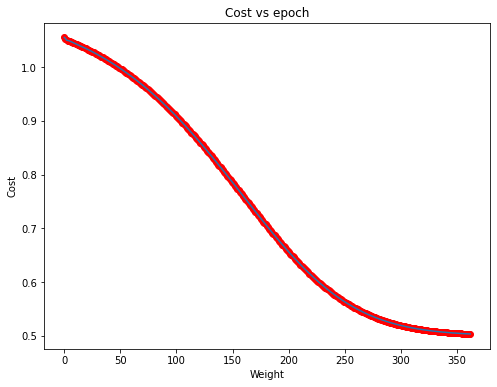

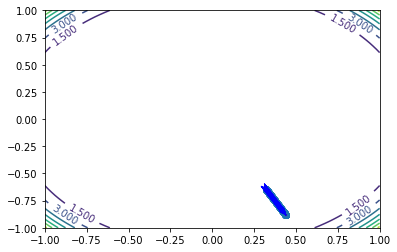

res^2 = res[0]**2 + res[1]**2:  0.9743048531419041 ~=  1


In [27]:
eta = 0.001
w_1 = np.random.uniform(-0.99,0.99)
w_2 = np.random.uniform(-0.99,0.99)
# # print(grad_loss(w_1,w_2))
res = Nesterov_acc_gradient_descent(w_1, w_2,momentum=0.9, iterations = 1000, learning_rate = eta,
                     stopping_threshold = 0.0001)
print("res^2 = res[0]**2 + res[1]**2: ",res[0]**2 + res[1]**2,"~= ",round(res[0]**2 + res[1]**2))

4. Minimize $f(x, y)$ using Adam optimizer. Show contour plot of the function. After every update, using arrow show the movement in the contour plots. Do it till convergence.

In [28]:
def Adam_optim_gradient_descent(w_1, w_2,m1,m2, iterations = 1000, learning_rate = 0.01,
                     stopping_threshold = 0.001):
     
    # Initializing weight, bias, learning rate and iterations
    start_pt = np.array([w_1,w_2])

    start_pt_0 = start_pt

    iterations = iterations
    learning_rate = learning_rate
     
    costs = []
    weights = []
    previous_cost = None

    pts = []
    p_t = []
    q_t = []
     
    # Estimation of optimal parameters
    for i in range(iterations):
        pts.append(start_pt)
         
        # Calculationg the current cost
        current_cost = error_fn_q3(start_pt[0],start_pt[1])
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(start_pt)
         
        grad_E = np.array(grad_loss(start_pt))

         
        # Updating weights and bias
        if i > 0:
          p_1 = m1*p_t[i-1] + (1-m1)*grad_E ## adam optimizer
          q_1 = m2*q_t[i-1] + (1-m2)*(grad_E**2)

          p_t.append(p_1)
          q_t.append(q_1)

          p_hat_t = p_1/(1-(m1**i))
          q_hat_t = q_1/(1-(m2**i))

          epsilon = 10**(-8)
          
          start_pt = start_pt - (learning_rate*(p_hat_t/(np.sqrt(q_hat_t) + epsilon)))

        else:
          p_t.append(0) #initialize values
          q_t.append(0)
          start_pt = start_pt - np.dot(learning_rate,grad_E)
        

                 
        # Printing the parameters for each 1000th iteration
        # print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {start_pt}")
     
    weights = np.array(weights) 
    epochs = np.linspace(0,len(costs),len(costs) )
    # Visualizing the weights and cost at for all iterations
    print(f"========================Learning Rate:{learning_rate}========================")
    print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {start_pt}")
    plt.figure(figsize = (8,6))
    plt.plot(epochs, costs)
    plt.scatter(epochs, costs, marker='o', color='red')
    plt.title("Cost vs epoch")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
    

    theta0_grid = np.linspace(0-1.0,0+1.0,101)
    theta1_grid = np.linspace(0-1.0,0+1.0,101)
    X, Y = np.meshgrid(theta0_grid, theta1_grid)

    J_grid = error_fn_q3(X,Y)
    contours = plt.contour(X, Y, J_grid, 10)
    plt.clabel(contours)
    # The target parameter values indicated on the cost function contour plot
    for j in range(1,len(weights)):
      plt.annotate('', xy=weights[j], xytext=weights[j-1],
                    arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1},
                    va='center', ha='center')
    plt.scatter(weights[:,0],weights[:,1] )
    # plt.plot(weights[:,0],weights[:,1], 'r' )
    plt.plot(weights[:,0],weights[:,1], 'r' )
    

    plt.show()
    
     
    return start_pt

========================Learning Rate:0.001========================
Iteration 128: Cost 0.5006968545853692, Weight         # [-0.66007217 -0.74329486]


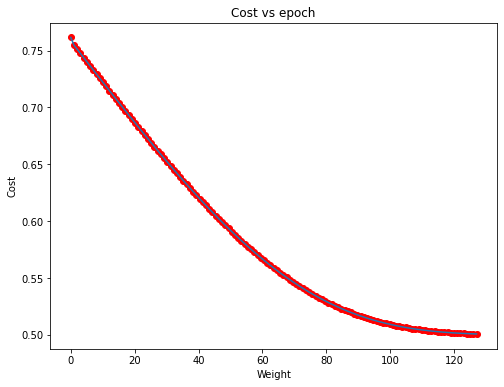

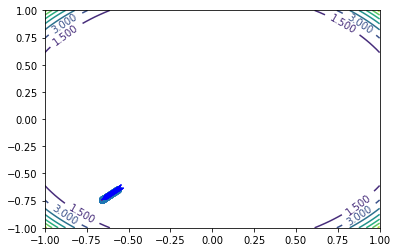

res^2 = res[0]**2 + res[1]**2:  0.988182515665816 ~=  1


In [29]:
eta = 0.001
w_1 = np.random.uniform(-0.99,0.99)
w_2 = np.random.uniform(-0.99,0.99)
# # print(grad_loss(w_1,w_2))
res = Adam_optim_gradient_descent(w_1, w_2,m1=0.9,m2=0.99, iterations = 1000, learning_rate = eta,
                     stopping_threshold = 0.0001)
print("res^2 = res[0]**2 + res[1]**2: ",res[0]**2 + res[1]**2,"~= ",round(res[0]**2 + res[1]**2))

# Question 4
Download Concrete Compressive Strength dataset from the link below.
https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
The concrete compressive strength is the regression problem. There are a
total of 1030 examples with 8 variables. Randomly split the data in training set
(70% of total points) and testing set (30% of total points)
Train a 3-layer neural network (with three variations of number of hidden
nodes 25, 50, 75) that can predict the value of Concrete compressive strength,
given 8 inputs. Use following activation functions: (a)tanh, (b) Relu. Use
squared error loss function at the output. Train using RProp, Quickprop and
batch Back-propagation (BP) for 1000 epochs. Report the following.

1. For every setting (number of hidden nodes, activation function), plot MSE versus number of epochs curves for (a) Rprop, (b) Quickprop and (c) Backpropagation. Comment on your observation.

In [ ]:
# download the dataset
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls # for google colab


In [ ]:
# !pip install pandas # for google colab
# !pip install --upgrade xlrd # for google colab

In [ ]:
import os
# print(os.listdir("."))
import pandas as pd
data = pd.read_excel('Concrete_Data.xls')
for key in data.keys():
  for i in range(1030):
    print(data[key][i])
    

In [42]:
# pre-processing
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_excel('Concrete_Data.xls')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset 70: 30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

for i in X_train[list(X_train.keys())[0]]:
  print(i)
  break
print(y_train)

382.0
772    24.000660
997    45.304778
724    35.763120
167    74.194512
764    14.699628
         ...    
277    36.969703
763     6.267337
835    15.416683
559    39.435269
684    50.732334
Name: Concrete compressive strength(MPa, megapascals) , Length: 721, dtype: float64


In [88]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [84]:
def Divergence(y_pred,y_real): # squared error loss
  return ((y_pred-y_real)**2)/(2)

In [85]:
def grad_div_out(y_pred, y_real):
  return (y_pred-y_real)

In [86]:
# Activation functions
def tanh(z):
  tan_h = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
  dtan_h_dz = 1-tan_h**2
  return tan_h, dtan_h_dz

def relu(z):
  rel_u = np.max(z,0)
  if z > 0:
    drel_u = 1
  else:
    drel_u = 0

  return rel_u, drel_u

In [ ]:
# backprop
num_layers = 3
hidden_size = 25
input_size = 8
output_size = 1

num_samples = 1030


for hidden_size in [25,50,75]:
  loss = []
  Loss = []
  for epoch in tqdm(range(1000)):
    loss.append([])
    Err = 0 # init total error = 0
    grad_w_Err = []
    grad_b_Err = []

    # W = [w_ij^k]
    W = []
    D = []
    B = []
    t = 0 # training sample index
    for k in range(num_layers):
      D.append([])
    D[0] = input_size
    D[1] = hidden_size
    D[2] = output_size
    for k in range(0,num_layers):
      W.append([])
      for j in range(D[k]):
        W[k].append([])
        for i in range(D[k-1]):
          W[k][j].append(0) # initialize all weights to 0
    for k in range(num_layers):
      B.append([])
      for j in range(D[k]):
        B[k].append(0) # init all biases to 0

    for k in range(num_layers):
        grad_w_Err.append(0) #init gradients of total error wrt to weights and biases to 0
        grad_b_Err.append(0)

    y_actual = []
    for key in y_train.keys():
      y_actual.append(y_train[key]) # predicted output for t th test case
      # print(y_train[key]) 

    for t in range(len(list(X_train.keys())[0] )):
      Z = []
      y = []
      del_y = []

      grad_y_Div = [] # init grads of divergence
      grad_z_Div = []
      grad_w_Div = []
      grad_b_Div = []

      for k in range(num_layers):
            grad_y_Div.append(0)
            grad_z_Div.append(0)
            grad_w_Div.append(0)
            grad_b_Div.append(0)

      for k in range(num_layers):
        Z.append([])
        for j in range(D[k]):
          Z[k].append(0)
      for k in range(num_layers):
        y.append([])
        del_y.append([])

        for j in range(D[k]):
          del_y[k].append(0)
          if k == 0:
              y[k].append(X_train[list(X_train.keys())[j]][list(X_train[list(X_train.keys())[j]].keys())[t]]) # input of the t th sample
              # print(list(X_train.keys())[j],list(X_train[list(X_train.keys())[j]].keys())[t], y[k][j])
          else:
            y[k].append(0)

      # Forward Pass
      gnd_truth = y_actual[t]
      for k in range(1,num_layers):
        for j in range(D[k]):
          Z[k][j] = 0
          for i in range(D[k-1]):
            Z[k][j] += W[k][j][i]*y[k-1][i] # add weighted input from prev layer
          Z[k][j] += B[k][j] # add bias
          if k == 1:  
            y[k],del_y[k] = tanh(np.array(Z[k])) # apply activation function
          else:
            y[k],del_y[k] = tanh(np.array(Z[k])) # apply activation function
            y[k] = np.sum(y[k])
            del_y[k] = np.sum(del_y[k])




      output_Y = y[num_layers-1]
      # print(f"loss: {Divergence(output_Y,gnd_truth)}")
      loss[epoch].append(Divergence(output_Y,gnd_truth))
      # Backward Pass
      for k in range(num_layers-1, 0, -1):
        if k == num_layers -1:
          grad_y_Div[k] = grad_div_out(output_Y, gnd_truth)
        try:
          grad_z_Div[k] = np.matmul(np.array(grad_y_Div[k]),np.array(del_y[k]))
        except:
          grad_z_Div[k] = np.array(grad_y_Div[k])*np.array(del_y[k])
        try:
          grad_y_Div[k-1] = np.matmul(np.array(grad_z_Div[k]),np.array(W[k]))
        except:
          grad_y_Div[k-1] = np.array(grad_z_Div[k])*np.array(W[k])
          

        try:
          grad_w_Div[k] = np.matmul(np.array(y[k-1]),np.array(grad_z_Div[k]))
        except:
          grad_w_Div[k] = np.array(y[k-1])*np.array(grad_z_Div[k])

          grad_b_Div[k] = np.array(grad_z_Div[k])


        grad_w_Err[k] += np.array(grad_w_Div[k])/len(list(X_train.keys())[0] )
        grad_b_Err[k] += np.array(grad_b_Div[k])/len(list(X_train.keys())[0] )

        # update
        W[k] -= grad_w_Err[k]
        B[k] -= grad_b_Err[k]

    Loss.append(np.min(loss[epoch]))
  plt.figure(figsize = (8,6))
  plt.plot(Loss,np.linspace(1,1000,1000))
  plt.show()


    
      



Find the final training and test MSE values for each setting. Report all
of them using a table at the beginning of the notebook itself.
